In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tsne-scores/tsne_scores.csv


# RITAJ M. ALMUTAIRI - 2006532 
# LAB4

In [19]:
#Required libraries
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib
import math

In [20]:
#Storing and reading the data file.

fileName = "/kaggle/input/tsne-scores/tsne_scores.csv"


df = pd.read_csv(fileName)
df.head()

,t-SNE-1,t-SNE-2
0,10.846841,-16.712580
1,24.794334,-16.775398
2,2.953309,13.379048
3,27.262146,-31.886690
4,-23.015728,64.468376


# **Q1** #

**Q1.A Since there are 2 dim in the dataset , the MinPts = 2*No.Dim 
So, the number of Minpts = 2 *2 = 4**
**Q1.B "make the k value as (MinPts+1)" So, k =5**

# Using the K-nearst neighbor

In [21]:
#Neighbor from sikitlearn library
neighbor = NearestNeighbors(n_neighbors=5)

nbrs = neighbor.fit(df)
distances, indices = nbrs.kneighbors(df) #An array of distance


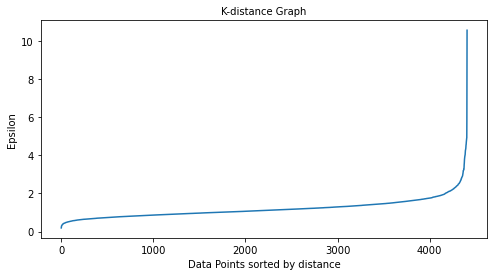

In [22]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)

distances = distances[:,4]
plt.figure(figsize=(8,4))

plt.plot(distances)
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.show()

**Eps=3**

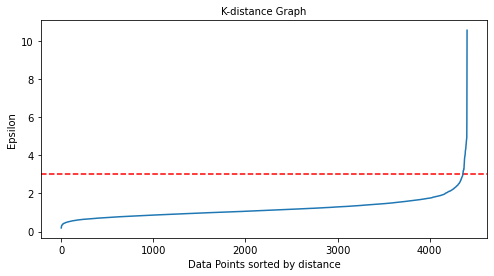

In [23]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:]

plt.figure(figsize=(8,4))

plt.axhline(y=3, color='r', linestyle='--')
plt.plot(distances)
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.show()

**Q1.2**

In [24]:
#Passing the parameters(eps,MinPts)
#using DBSCAN from dbscan library
dbscan=DBSCAN()

dbscan_opt=DBSCAN(eps=3 ,min_samples=5)
dbscan_opt.fit(df[['t-SNE-1','t-SNE-2']])

DBSCAN(eps=3)

In [25]:
#Clusters
df['DBSCAN_opt_labels']=dbscan_opt.labels_ 
df['DBSCAN_opt_labels'].value_counts()

 1     1512
 0      836
 2      767
 3      301
 7      283
 5      246
 6      232
 4      145
-1       31
 9       13
 8       11
 11      10
 12       8
 10       6
 13       5
Name: DBSCAN_opt_labels, dtype: int64

**Q1.3**

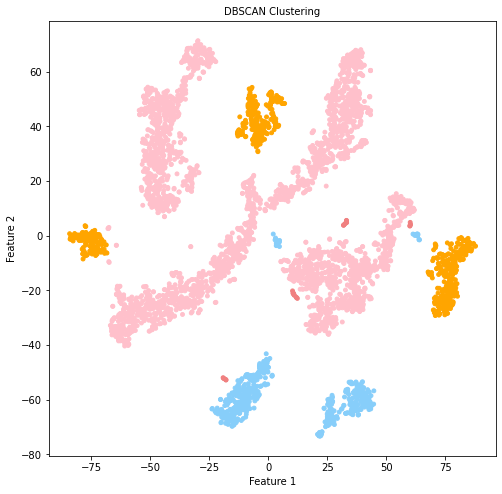

In [26]:
colors=['pink','orange','lightskyblue','lightcoral']

#Scattering the resulted clusters

plt.figure(1,figsize=(8,8))

plt.scatter(df[['t-SNE-1']],df[['t-SNE-2']],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)

plt.title('DBSCAN Clustering',fontsize=10)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)

plt.show()

# Q2

**Applying K-mean**

In [27]:
# 1. K-Means
from sklearn.cluster import KMeans

k_means=KMeans(n_clusters=4,random_state=42)

k_means.fit(df)

KMeans(n_clusters=4, random_state=42)

In [28]:
#Kmean Clusters
df['KMeans_labels']=k_means.labels_

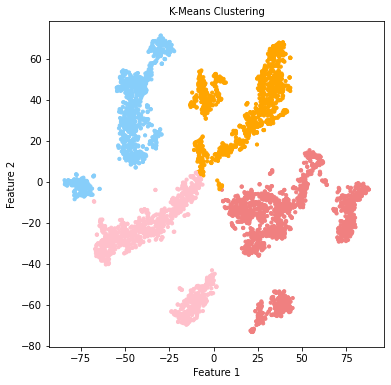

In [29]:
# Plotting resulting clusters
colors=['pink','orange','lightskyblue','lightcoral']

plt.figure(figsize=(6,6))

plt.scatter(df[['t-SNE-1']],df[['t-SNE-2']],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=10)

plt.title('K-Means Clustering',fontsize=10)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)

plt.show()

**Herarical**

In [30]:
#Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering

heraricalModel = AgglomerativeClustering(n_clusters=4, affinity='euclidean') #Using euclidean distance
#Fitting the model
heraricalModel.fit(df[['t-SNE-1','t-SNE-2']])

AgglomerativeClustering(n_clusters=4)

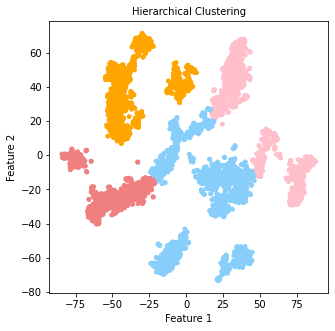

In [31]:
# Plotting Hierarchical Clustering
df['HR_labels']=heraricalModel.labels_

# Plotting resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(df['t-SNE-1'],df['t-SNE-2'],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=10)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()

**Q2.2**

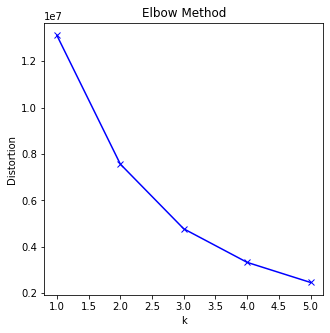

In [32]:
k_range=5

dist = []
K = range(1,k_range+1)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    dist.append(kmeanModel.inertia_)
        
fig , axs = plt.subplots(1,figsize=(5,5))
plt.plot(K, dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show();    

**Q2.3 Comparing between herarical and kmean.**

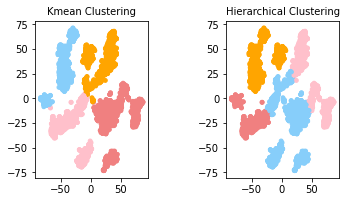

In [33]:
# Plot the identified clusters and compare it with the 4 metrics.
fig,axs = plt.subplots(nrows=1,ncols=2)


axs[0].scatter(df[['t-SNE-1']],df[['t-SNE-2']],c=df['KMeans_labels'], cmap=matplotlib.colors.ListedColormap(colors),s=15)
axs[0].set_title("Kmean Clustering",fontsize = 10)

axs[1].scatter(df['t-SNE-1'],df['t-SNE-2'], c=df['HR_labels'], cmap=matplotlib.colors.ListedColormap(colors), s=15)
axs[1].set_title('Hierarchical Clustering',fontsize=10)

#Set space between the subgraphs.
fig.tight_layout(pad=5.0)
